In [39]:
import shapefile
from shapely.ops import transform as ops_transform
from shapely.geometry import Polygon
from descartes import PolygonPatch

In [2]:
sf = shapefile.Reader("..\\tep\\data\\raw\\2018\\AK\\2013-HD-ProclamationPlan\\2013ProclamationPlan.shp")
shapes = sf.shapes()
len(shapes)

40

In [3]:
print("bbox: ",shapes[0].bbox)
#print("parts: ",shapes[0].parts)
#print("points: ",shapes[0].points)
print("shapeType: ",shapes[0].shapeType)
print("shapeTypeName: ",shapes[0].shapeTypeName)

bbox:  [293105.13599999994, 1663534.953400001, 299066.80309999996, 1669770.4185000008]
shapeType:  5
shapeTypeName:  POLYGON


In [6]:
numPoints = len(shapes[0].points)
print("points: ",shapes[0].points[int(round(numPoints/2,0))])

points:  (296603.5508999992, 1664177.9129000008)


In [7]:
from pyproj import Proj, transform
inputProj = Proj("+init=EPSG:3338") #Alaska Albers
outputProj = Proj("+init=EPSG:4326") #WGS84

In [8]:
m_lllon, m_lllat, m_urlon, m_urlat = tuple(shapes[0].bbox)

In [9]:
d_lllon, d_lllat = transform(inputProj, outputProj, m_lllon, m_lllat)
d_urlon, d_urlat = transform(inputProj, outputProj, m_urlon, m_urlat)
print(d_lllon, d_lllat)
print(d_urlon, d_urlat)

-147.8197044243121 64.81017068480666
-147.6822772119278 64.86081294209436


In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection

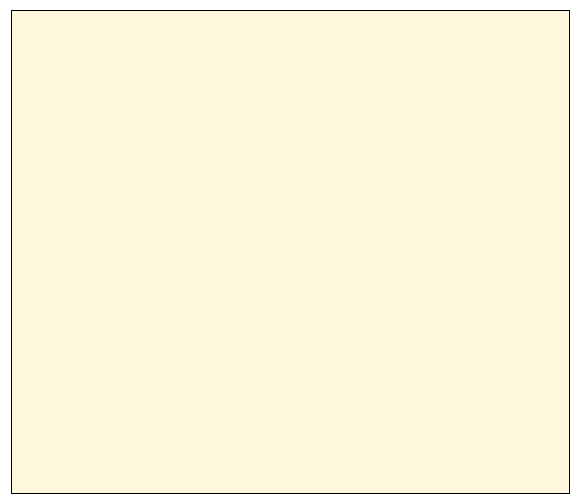

In [12]:
fig, ax = plt.subplots(figsize=(10,20))
mm = Basemap(resolution = 'c',
           projection = 'merc',
           llcrnrlon = d_lllon, llcrnrlat = d_lllat,
           urcrnrlon = d_urlon, urcrnrlat = d_urlat)
water = 'lightskyblue'
earth = 'cornsilk'
coast = mm.drawcoastlines()
rivers = mm.drawrivers(color=water, linewidth=1.5)
continents = mm.fillcontinents(
    color=earth,
    lake_color=water)
bound= mm.drawmapboundary(fill_color=water)
countries = mm.drawcountries()

In [13]:
shapes[0].points[0:3]

[(295784.8498999998, 1669372.3011000007),
 (295787.81489999965, 1669342.8972999994),
 (295833.68590000086, 1669365.4842000008)]

In [14]:
d_points = []
for x,y in shapes[0].points:
    d_point = transform(inputProj, outputProj, x, y)
    d_points.append(d_point)
d_points[0:3]

[(-147.7519860006006, 64.86003900029485),
 (-147.75198200089588, 64.85977400003972),
 (-147.7509740004371, 64.85993699990497)]

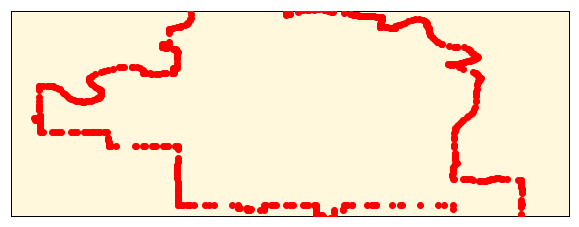

In [27]:
fig, ax = plt.subplots(figsize=(10,20))
mm = Basemap(resolution = 'c',
           lat_0 = 64.789785, lon_0 = -150.996703,
           #llcrnrlon = -169.49, llcrnrlat = 53.4, urcrnrlon = -129.4, urcrnrlat = 71.63)
           llcrnrlon = d_lllon, llcrnrlat = d_lllat,
           urcrnrlon = d_urlon, urcrnrlat = d_urlat)
water = 'lightskyblue'
earth = 'cornsilk'
coast = mm.drawcoastlines()
#rivers = mm.drawrivers(color=water, linewidth=1.5)
continents = mm.fillcontinents(
    color=earth,
    lake_color=water)
bound= mm.drawmapboundary(fill_color=water)
countries = mm.drawcountries()
d_x, d_y = zip(*d_points)
district1 = mm.scatter(d_x, d_y, color = 'red', zorder = 10)

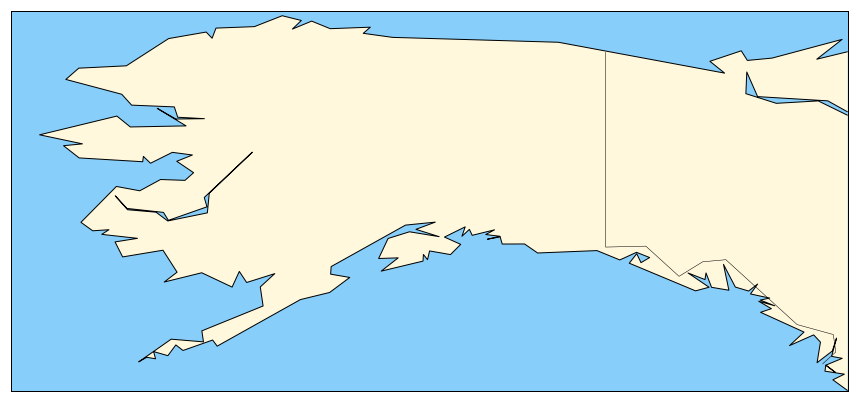

In [78]:
fig, ax = plt.subplots(figsize = (15,15))
mm = Basemap(resolution = 'c', #projection = 'merc',
           lat_0 = 64.789785, lon_0 = -150.996703,
           llcrnrlon = -169.49, llcrnrlat = 53.4, urcrnrlon = -129.4, urcrnrlat = 71.63)
           #llcrnrlon = d_lllon, llcrnrlat = d_lllat,
           #urcrnrlon = d_urlon, urcrnrlat = d_urlat)
water = 'lightskyblue'
earth = 'cornsilk'
coast = mm.drawcoastlines()
continents = mm.fillcontinents(
    color=earth,
    lake_color=water)
bound= mm.drawmapboundary(fill_color=water)
countries = mm.drawcountries()
for d_x, d_y in d_points:
    x, y = m(d_x, d_y)
    #print("degree %0.4f, %0.4f" % (d_x, d_y))
    #print("coordinates %f, %f" % (x, y))
mm.scatter(d_x, d_y, color = 'red')